## ANN(1) - ANN의 구조

### ANN이란?

![test](https://www.researchgate.net/profile/Facundo-Bre/publication/321259051/figure/fig1/AS:614329250496529@1523478915726/Artificial-neural-network-architecture-ANN-i-h-1-h-2-h-n-o.png)

1. Input Layer, Hidden Layer, Output Layer 3 단계로 나눌 수 있습니다.\
    `Input Layer` : n개의 입력값을 받는 층(layer)입니다.\
    `Hidden Layer` : 입력과 출력사이의 복잡한 관계를 학습하는 층(layer)입니다.\
    `Output Layer` : 네트워크의 최종 출력을 생성하는 층(layer)입니다.
2. n개의 변수($x_1, x_2, ... ,x_n$)가 입력되어 m개의 값($y_1, y_2, ... y_m$)출력되는 함수라고 생각해도 좋을 것 같습니다.$f(x_1, x_2, ... ,x_n) = (y_1, y_2, ... ,y_m)$
    * 그림에는 Output이 n개지만 꼭 입력값과 같을 필요는 없습니다. (실제로는 $P(n=m)$의 값이  매우 낮습니다.)

### 노드(뉴런)

![노드](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F9966F6385B74690709)

1. 노드 구조는 다음과 같습니다.
 - $x_k(k=0,1,2)$ : 이전 층(혹은 노드)에서 나온 출력값입니다.
 - $w_k(k=0,1,2)$ : x_k의 가중치입니다.
 - $b$ : 노드에 사용되는 bias(편향치)입니다.
 - $y$ : 노드의 출력값입니다.

2. 계산 식은 다음과 같습니다 : $\displaystyle\sum\limits_{i=0}^{2}(x_0w_0) + b = y$
3. 노드가 여러개 모이면 한개의 층(layer)을 형성합니다.
    

### Fully Connected Layer(FC layer)

![Fully Connected Layer](https://miro.medium.com/v2/resize:fit:720/1*VHOUViL8dHGfvxCsswPv-Q.png)

1. 직역 그대로 완전히 연결되어 있는 층(layer)이라고 생각하시면 됩니다.
2. 그림과 같이 각 층(layer)에 있는 노드가 다음 층에 있는 노드와 빠짐없이 전부 연결되어 있습니다.
3. $i$번째 층(layer)에 있는 노드가 $p$개 $i+1$번째 층(layer)에 있는 노드가 $q$개라면, $i$번째 층(layer)과 $i+1$번째 층(layer)을 잇는 선은 총 $p^q$개입니다.

### Forward Propagation

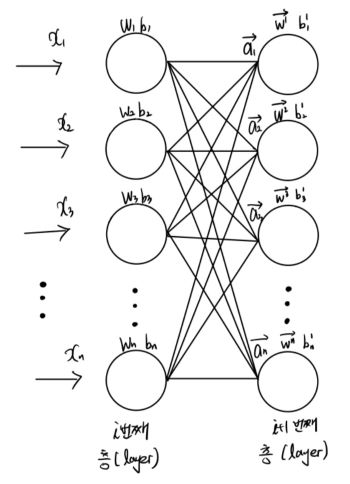

**※아무거나 사진 퍼오기가 무서워서 공부할겸 직접 그려봤습니다..**

1. 편의상 $i$번째 층의 각각의 노드에 들어가는 입력값을 $x_1, x_2, ... x_n$이라고 하겠습니다.
2. 입력값들은 노드를 지나칠 때마다 가중치를 곱하고 편향(bias)를 더합니다.
    - k번째 노드에서의 계산은 다음과 같습니다. $x_kw_k+b_k$
3. Fully Connected Layer에 의해서 $i+1$번째 층(layer)에서 각각의 노드는 입력값을 벡터로 받게 됩니다 : $\displaystyle\overrightarrow{a^1} = \displaystyle\left(a^1_1 a^1_2 ... a^1_n \right)$
4. $i+1$번째 층(layer)의 $k$번째 노드에서의 연산은 다음과 같습니다.
    * $\displaystyle\overrightarrow{a_k}(\overrightarrow{w_k})^T + b^1_k$
6. 각 노드에서는 가중치(weight)곱과 편향(bias)합 연산이 이루어지고, `Activation Function`을 거치게 됩니다.

### Gradient descent & Back Propagation

#### Gradient descent

1. `Hidden Layer`에서 여러 가중치(weight)와 편향(bias)의 연산을 마치고 난 값들은 `Output Layer`의 입력값으로 들어가게 됩니다.
2. `Output Layer`에서도 여러 연산이 있지만 `Loss Function`을 통해서 예측값과 정답의 차이를 계산하게 됩니다.
3. 이때 예측값과 정답의 차이 즉, `Loss`를 줄여나가야 효과적인 딥러닝 모델이라고 볼 수 있겠죠?
4. `Loss`를 줄이는 방법으로 미분이 사용됩니다.

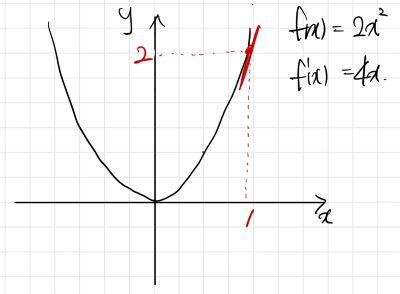

1. 아이디어는 다음과 같습니다.
 * 쉬운 예로 `Loss Function`을 다음과 같이 정의합니다 : $f(x)=2x^2$
 * 그림과 같이 `Loss Function`을 미분하여 기울기를 얻으면, -(기울기)가 곧 $f(x)$의 최소값으로 향하는 방향이 됩니다.
 * $f'(1)=4$이므로 -4는 $f(x)$가 최소로 되는 방향을 가르킵니다. 실제로 $1-f'(1)$을 하게 되면 최소가 있는 $x=0$방향으로 이동합니다.
 * 따라서 $x$를 다음과 같이 업데이트 할 수 있습니다 : $x \to x-f'(x)$\
\
2. 하지만 $x \to x-f'(x)$로 업데이트 할 경우 다음과 같은 문제가 있습니다.
$x \to x-f'(x) = -3x$\
\
$x=1)$\
$1 \to -3$\
\
$x=-3)$\
$ -3 \to (-3)(-3)=9$\
\
$x=9)$\
$9 \to (-3)9 = -27$

3. 즉 $x$값은 $f(x)$가 최소인 $x$로 수렴하지 못하고 발산하게 됩니다.
4. 이는 learning rate(학습률)로 해결할 수 있습니다.


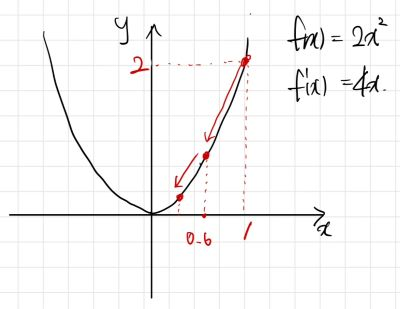

$x \to x - \alpha f'(x)(\alpha = 0.1)$\
$x \to x - 0.1f'(x)$
$x \to 0.6x$\
\
$x=1)$\
$1 \to 0.6$\
\
$x=0.6)$\
$0.6 \to 0.36$

`-` 이렇게 $\alpha$(learning rate)를 곱해주면 앞서 발산하는 문제를 해결할 수 있습니다.\
`-` 경사를 따라 내려온다고 하여 경사하강법으로도 불립니다.(Gradient descent)

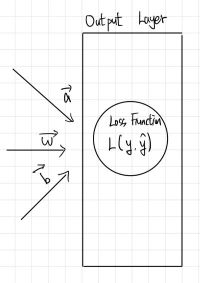

`-` `Output Layer`에 있는 `Loss Function`을 시각화한 그림입니다.

1. 실제 `Loss function`은 앞선 2차식처럼 단순하지 않습니다.
2. `Hidden Layer`의 Layer 수와 각 Layer의 노드 수, 그리고 입력값에 따라 영향을 받습니다.
3. 따라서 `Loss Function`을 가중치(`weight`)와 편향(`bias`)에 대해 편미분을 해줘야 합니다.
4. 그렇게 여러 차례 미분해서 Loss Function을 최소화 시켜줍니다.

`-` Forward Propagation이 `Input Layer`에서 `Output Layer`의 방향으로 계산된다면,\
`-` Back Propagation은 `Output Layer`에서 `Input Layer`방향으로 계산됩니다.

### Weight initialization

1. LeCun Initialization\
 $w \sim U(- \sqrt{\displaystyle\frac{3}{N_{in}}}, \sqrt{\displaystyle\frac{3}{N_{in}}})$ **or** $w \sim N(0, \displaystyle\frac{1}{N_{in}})$
$

3. Xavier(Sigmoid/tanh 사용하는 신경망)\
$w \sim U\left(-\sqrt{\displaystyle\frac{3}{N_{\text{in}} + N_{\text{out}}}}, \sqrt{\displaystyle\frac{3}{N_{\text{in}} + N_{\text{out}}}}\right)$
**or** $w \sim U\left(0, \displaystyle\frac{2}{N_{\text{in}} + N_{\text{out}}}\right)$

4. He(ReLU 사용하는 신경망)\
$w \sim U\left(-\sqrt{\displaystyle\frac{6}{N_{\text{in}}}}, \sqrt{\displaystyle\frac{6}{N_{\text{in}}}}\right)$  **or**
$w \sim \left(0, \displaystyle\frac{2}{N_{\text{in}}}\right)$

* $N_{\text{in}}$ : 이전 layer `노드`의 수
* $N_{\text{out}}$ : 이후 layer `노드`의 수

### Activation Function(sigmoid, tanh)

`-` 노드는 `Affine Function`과 `Activation Function`으로 이루어져있습니다.

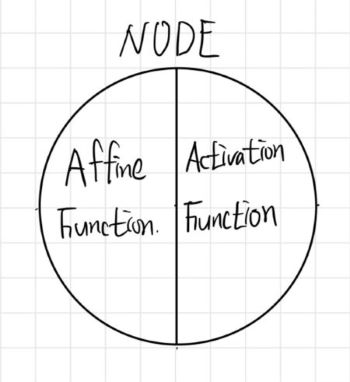

`-` `Affine Function`
 * 입력값을 $x$, `Affine Function`을 $f(x)$라고 정의할 때, 다음과 같습니다.\
    $f(x) = xw + b = z$

`-` `Activation Function`
 * 계산된 $z$값을 `Activation Function` $g(z)$에 넣어줍니다 : $g(z) = a$
 * `Activation Function`의 종류는 크게 세가지로 나눌 수 있습니다.\
    $\Rightarrow$ Sigmoid, tanh, ReLu

#### Sigmoid

$Sigmoid(z) = \displaystyle\frac{1}{1+e^{-z}}$

![sigmoid](https://mblogthumb-phinf.pstatic.net/20150612_71/2feelus_14340466751522xoTj_PNG/2015-06-12_at_3.20.33_AM.png?type=w2)

#### tanh(hyperbolic tangent)

$tanh(z) = \displaystyle\frac{e^{z}-e^{-z}}{e^{z}+e^{-z}}$



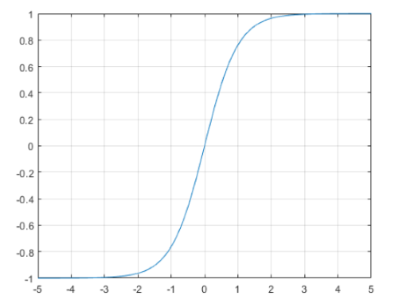

`-` `Activation Function`을 사용해야 하는 이유
* 기본적으로 Affine Function은 `lienar function`이므로 Affine Function만 계속해서 늘려간다면, Hidden Layer가 아무리 깊어도 학습효과를 누리지 못함. 